In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

# Data Preparation

In [3]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH = Path('/') 
path = PATH

In [4]:
LM_PATH= Path("data/models/")
LM_PATH.mkdir(parents=True, exist_ok=True)
LM_PATH.ls()

[]

In [5]:
df = pd.read_csv(f"songs_bs.csv")
df.head()

,web-scraper-order,web-scraper-start-url,pages,pages-href,songs,songs-href,text,label
0,1543229139-166,https://songteksten.net/artist/lyrics/40/the-b...,5,https://songteksten.net/artist/lyrics/40/the-b...,Junk,https://songteksten.net/lyric/40/930/the-beatl...,The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...,beatles
1,1543228955-76,https://songteksten.net/artist/lyrics/40/the-b...,7,https://songteksten.net/artist/lyrics/40/the-b...,Sure To Fall (In Love With You),https://songteksten.net/lyric/40/1028/the-beat...,The Beatles - Sure To Fall (In Love With You)\...,beatles
2,1543229286-237,https://songteksten.net/artist/lyrics/40/the-b...,3,https://songteksten.net/artist/lyrics/40/the-b...,Glad All Over,https://songteksten.net/lyric/40/856/the-beatl...,The Beatles - Glad All Over\nAin`t no doubt ab...,beatles
3,1543229320-253,https://songteksten.net/artist/lyrics/40/the-b...,2,https://songteksten.net/artist/lyrics/40/the-b...,Everybody's Got Something To Hide Except For M...,https://songteksten.net/lyric/40/841/the-beatl...,The Beatles - Everybody's Got Something To Hid...,beatles
4,1543229294-241,https://songteksten.net/artist/lyrics/40/the-b...,3,https://songteksten.net/artist/lyrics/40/the-b...,From Us To You,https://songteksten.net/lyric/40/852/the-beatl...,The Beatles - From Us To You\nDa da da da da d...,beatles


In [6]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'pages', 'pages-href',
       'songs', 'songs-href', 'text', 'label'],
      dtype='object')

In [7]:
#select columns
df = df[['text', 'label']]

In [8]:
#rename columns
df.rename(columns= {}, inplace=True)

In [9]:
#del df['ColumName']
df.head()


,text,label
0,The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...,beatles
1,The Beatles - Sure To Fall (In Love With You)\...,beatles
2,The Beatles - Glad All Over\nAin`t no doubt ab...,beatles
3,The Beatles - Everybody's Got Something To Hid...,beatles
4,The Beatles - From Us To You\nDa da da da da d...,beatles


In [10]:
from bs4 import BeautifulSoup

In [11]:
df['text'] = df['text'].astype(str)

In [12]:
df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [13]:
df['text'].head()

0    The Beatles - Junk\n(demo)\n\nMotorcars\n\nHan...
1    The Beatles - Sure To Fall (In Love With You)\...
2    The Beatles - Glad All Over\nAin`t no doubt ab...
3    The Beatles - Everybody's Got Something To Hid...
4    The Beatles - From Us To You\nDa da da da da d...
Name: text, dtype: object

In [14]:
df.replace({'The Beatles -': ''}, regex=True, inplace=True)

In [15]:
df.replace({'Rolling Stones -': ''}, regex=True, inplace=True)

In [16]:
df['text'].head()

0     Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...
1     Sure To Fall (In Love With You)\nI`m sure to ...
2     Glad All Over\nAin`t no doubt about it\n\nThi...
3     Everybody's Got Something To Hide Except For ...
4     From Us To You\nDa da da da da dum dum dum\n\...
Name: text, dtype: object

In [17]:
columns_fill_zero = []

In [18]:
columns_fill_string = ['text']

In [19]:
df[columns_fill_string] = df[columns_fill_string].fillna("")
df[columns_fill_zero].fillna(0, inplace=True)

/home/martijn/anaconda3/envs/FastAI_P37/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [20]:
df[columns_fill_string +columns_fill_zero].head()

,text
0,Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...
1,Sure To Fall (In Love With You)\nI`m sure to ...
2,Glad All Over\nAin`t no doubt about it\n\nThi...
3,Everybody's Got Something To Hide Except For ...
4,From Us To You\nDa da da da da dum dum dum\n\...


In [21]:
df['length'] = len(df['text'])

In [22]:
df = df.sort_values(by=['length'], ascending=False)

In [23]:
#df = df[df['length'] > 100] #take text with more then 100 words

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 3 columns):
text      641 non-null object
label     641 non-null object
length    641 non-null int64
dtypes: int64(1), object(2)
memory usage: 20.0+ KB


In [25]:
#save the cleaned file
df.to_csv(f"clean.csv", index=False, header=True)

In [26]:
df = pd.read_csv(f"clean.csv")

## Some statistics of dataset

### Number of documents

In [27]:
df.shape, df.columns

((641, 3), Index(['text', 'label', 'length'], dtype='object'))

### Number of words in all the documents

In [28]:
df['text'] = df['text'].astype(str)

In [29]:
df['text'].apply(lambda x: len(x.split(" "))).sum()

126632

### Number of unique tokens across documents

In [30]:
len(set(''.join(df['text'].values).split(" ")))

14649

# Classifier

In [31]:
bs  = 24

In [32]:
df = pd.read_csv("clean.csv")
df['text'] = df['text'].astype(str)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 3 columns):
text      641 non-null object
label     641 non-null object
length    641 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.1+ KB


In [33]:
df_clas = df[['text', 'label']]
df_clas.head()

,text,label
0,Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...,beatles
1,"Susie Q\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Su...",stones
2,Like A Rolling Stone\nOnce upon a time you dr...,stones
3,"Uptight\nBaby, everything is all right, uptig...",stones
4,You Better Move On\nYou ask me to give up the...,stones


In [34]:
data_clas = (TextList.from_df(df_clas)
             .random_split_by_pct(0.1)
             .label_from_df(cols=1)      
             .databunch(bs = bs))
data_clas.save('tmp_clas')

In [35]:
data_clas = TextClasDataBunch.load('tmp_clas', bs = bs)

In [36]:
data_clas.show_batch()

text,label
"xxbos invitation \n okay ... \n baby , yeah \n lovin ` , lovin ` \n \n baby ... \n oh , i`m sending out invitations \n i`m gon na have me a big celebration , ... bration \n i`m givin ` up everything",stones
"xxbos no spare parts \n baby , baby , baby , baby ... \n \n daddy drunk , daddy drunk himself to death \n when he was thirty - five years old \n left five daughters an ` book ` em on the cayman row \n",stones
"xxbos cops and robbers \n as i was driving home along the boulevard late one night \n i saw a guy in the corner , bumming all alone \n as i passed him by , i heard him holler out : "" hey ! "" \n i",stones


In [37]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.5)


In [65]:
learn_clas.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


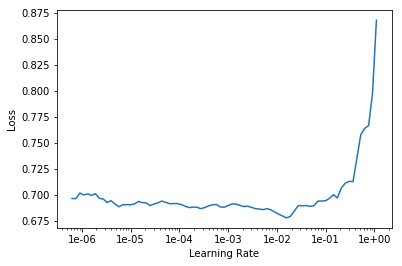

In [66]:
learn_clas.recorder.plot()

In [40]:
learn_clas.fit_one_cycle(3, 5e-3, moms=(0.8,0.7))

Total time: 00:54
epoch  train_loss  valid_loss  accuracy
1      0.652772    0.813732    0.359375  (00:18)
2      0.689725    0.684798    0.640625  (00:19)
3      0.695027    0.670322    0.671875  (00:17)



In [41]:
learn_clas.save('clas_first')

In [42]:
learn_clas.load('clas_first');

In [43]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 00:10
epoch  train_loss  valid_loss  accuracy
1      0.689733    0.668909    0.656250  (00:10)



In [44]:
learn_clas.save('clas_second')

In [45]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 01:08
epoch  train_loss  valid_loss  accuracy
1      0.695243    0.673441    0.625000  (00:13)
2      0.692670    0.665286    0.656250  (00:14)
3      0.691064    0.667855    0.656250  (00:13)
4      0.688279    0.670281    0.656250  (00:13)
5      0.691815    0.671360    0.656250  (00:13)



Results with LM

Total time: 01:10
epoch  train_loss  valid_loss  accuracy
1      0.155902    0.197050    0.921875  (00:13)
2      0.153857    0.178206    0.906250  (00:14)
3      0.126480    0.214810    0.906250  (00:13)
4      0.103315    0.251961    0.906250  (00:14)
5      0.091110    0.200896    0.906250  (00:14)



In [46]:
learn_clas.save('clas_third_no_lm')

In [64]:
#learn_clas.load('clas_third_no_lm')

In [67]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 01:23
epoch  train_loss  valid_loss  accuracy
1      0.694296    0.646066    0.656250  (00:16)
2      0.693648    0.644056    0.656250  (00:16)
3      0.694456    0.674458    0.656250  (00:16)
4      0.694803    0.669425    0.640625  (00:17)
5      0.689093    0.665548    0.640625  (00:16)



In [48]:
learn_clas.save('clas_fourth_no_lm')

In [68]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(5, slice(5e-5/(2.6**4),5e-5), moms=(0.8,0.7))

Total time: 01:22
epoch  train_loss  valid_loss  accuracy
1      0.693038    0.661084    0.640625  (00:15)
2      0.693060    0.667138    0.640625  (00:16)
3      0.688897    0.659143    0.640625  (00:16)
4      0.689206    0.663740    0.640625  (00:16)
5      0.694486    0.662008    0.640625  (00:16)



Results with LM 

Total time: 01:25
epoch  train_loss  valid_loss  accuracy
1      0.039479    0.153723    0.921875  (00:16)
2      0.033728    0.172656    0.906250  (00:17)
3      0.044471    0.167591    0.906250  (00:17)
4      0.039790    0.144773    0.937500  (00:17)
5      0.043201    0.148395    0.921875  (00:16)



In [50]:
learn_clas.save('clas_fifth_no_lm')

In [51]:
df_clas.head()

,text,label
0,Junk\n(demo)\n\nMotorcars\n\nHandlebars\n\nBi...,beatles
1,"Susie Q\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Su...",stones
2,Like A Rolling Stone\nOnce upon a time you dr...,stones
3,"Uptight\nBaby, everything is all right, uptig...",stones
4,You Better Move On\nYou ask me to give up the...,stones


In [245]:
df_val_true = df_clas.loc[df_clas['label']== 'stones']['text']
df_val_true.head()

1     Susie Q\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Su...
2     Like A Rolling Stone\nOnce upon a time you dr...
3     Uptight\nBaby, everything is all right, uptig...
4     You Better Move On\nYou ask me to give up the...
5     Long Long While\nBaby, baby been a long, long...
Name: text, dtype: object

In [180]:
df_val_true[1]

" Susie Q\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Susie Q\n\nI love you\n\nMy Susie Q\n\nI love the way you walk\n\nI love the way you talk\n\nLove the way you walk\n\nI love the way you talk\n\nMy Susie Q\n\nSay that you'll be true\n\nSay that you'll be true\n\nSay that you'll be true\n\nAnd never leave me blue\n\nMy Susie Q\n\nOh, Susie Q\n\nOh, Susie Q\n\nOh, Susie Q\n\nHoney I love you\n\nMy Susie Q  "

In [52]:
#new beatles tekst not in the training or validation
test_b = 'All you need is love, love. Love is all you need. '

In [53]:
#new stones tekst not in the training or validation
test_s = "I cant get no satisfaction cause I try and I try"

In [54]:
arr_results = []

In [55]:
pe = learn_clas.predict(test_b)
pe[0], pe[2].data[0], pe


('beatles', tensor(0.5056), ('beatles', tensor(0), tensor([0.5056, 0.4944])))

In [56]:
pe = learn_clas.predict(test_s)
pe[0], pe[2].data[0], pe

('stones', tensor(0.4954), ('stones', tensor(1), tensor([0.4954, 0.5046])))

#prediction with LM
('stones', tensor(0.1157), ('stones', tensor(1), tensor([0.1157, 0.8843])))

In [57]:
song_b = "A bad little kid moved in to my neighborhood He won`t do nothing right just sitting down and looks so good He don`t want to go to school and learn to read and write Just sits around the house and plays that rock and roll music all night  Well, he put some tacks on teachers chair Puts chewing gum in little girl`s hair Now, junior, behave yourself! Buy every rock and roll book on the magazine stand Every dime that he get-ooh is lost to the jukebox man Well he worries his teacher till at night she`s a-ready to poop From rockin` and a-rollin`, spinnin` in a hula hoop! Well this rock and roll has gotta stop Junior`s head is hard as rock Now, junior, behave yourself! ow!"
song_b2 = "Blackbird singing in the dead of night Take these broken wings and learn to fly All your life You were only waiting for this moment to arise  Blackbird singing in the dead of night Take these sunken eyes and learn to see All your life You were only waiting for this moment to be free.  Blackbird fly, Blackbird fly Into the light of a dark black night.  Blackbird fly, Blackbird fly  Into the light of a dark black night.  Blackbird singing in the dead of night  Take these broken wings and learn to fly All your life You were only waiting for this moment to arise You were only waiting for this moment to arise You were only waiting for this moment to arise" 

In [58]:
pe = learn_clas.predict(song_b2)
print(pe)

('stones', tensor(1), tensor([0.4721, 0.5279]))


In [59]:
song_s = "When I'm ridin round the world And I'm doin this and I'm signing that And I'm tryin to make some girl Who tells me baby better come back later next week  cause you see I'm on losing streak I can't get no, oh no no no  "
song_s2 = "I can't get no satisfaction I can't get no girl with action 'cause I try and I try and I try and I try I can't get no, I can't get no "

In [60]:
learn_clas.predict(song_s)


('stones', tensor(1), tensor([0.4684, 0.5316]))